In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import tensorflow as tf
import keras as k

Using TensorFlow backend.


In [2]:
sl=pd.read_csv(r"sign_mnist_train.csv")
sl.head(30)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [3]:
sl.shape

(27455, 785)

In [4]:
sl.label.unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

In [5]:
len(sl.label.unique())

24

In [6]:
len(sl.label.value_counts())

24

In [7]:
#sl.label=sl.label.replace({0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'})

In [7]:
sl.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [8]:
sen_col=sl.iloc[4]   #selectinh 1st record

In [9]:
sen_col=sen_col.iloc[1:]   ##dropping the 1st column....as its a non numeric(dropping the target variable)

In [10]:
abc=np.array(sen_col)

In [11]:
abc=abc.reshape(28,28)

In [12]:
abc.shape

(28, 28)

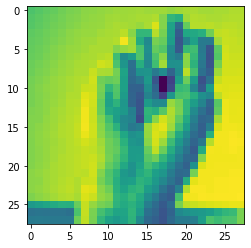

In [13]:
plt.imshow(abc)

In [14]:
sl['label']=sl['label'].map({0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,10:9,11:10,12:11,13:12,14:13,15:14,16:15,17:16,18:17,19:18,20:19,21:20,22:21,23:22,24:23})

In [15]:
sl_x=sl.iloc[:,1:]   #crating the x values
sl_y=sl.iloc[:,0] 

In [16]:
sl1=sl.iloc[:,1:786]
sl1=np.array(sl1)

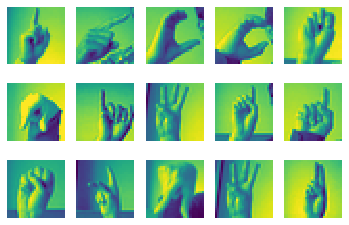

In [17]:
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(sl1[i,:].reshape(28,28))
    plt.axis('off')

In [18]:
sl_x_train,sl_x_test,sl_y_train,sl_y_test=train_test_split(sl_x,sl_y,test_size=.2,random_state=555)

In [19]:
print(sl_x_train.shape)
print(sl_y_train.shape)
print(sl_x_test.shape)
print(sl_y_test.shape)

(21964, 784)
(21964,)
(5491, 784)
(5491,)


In [20]:
sl_x_train=np.array(sl_x_train)
sl_x_test=np.array(sl_x_test)    #mandatory step---converting into array

In [21]:
for i in range(len(sl_x_train)):
    sl_x_train[i].reshape(28,28)

In [22]:
for i in range(len(sl_x_test)):
    sl_x_test[i].reshape(28,28)

In [23]:
sl_x_train=tf.keras.utils.normalize(sl_x_train)
sl_x_test=tf.keras.utils.normalize(sl_x_test)

##normalize the data........for better performance

### lets build the NN

In [24]:

model=tf.keras.models.Sequential()  #initialize the network
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))  #1st hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #2nd hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #3rd hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(24,activation=tf.nn.softmax)) #output layer use softmax function instead of relu

adam=tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
sl_y_train=np.array(sl_y_train)

In [26]:
model.fit(sl_x_train,sl_y_train,batch_size=64,epochs=50,validation_split=0.2)

Train on 17571 samples, validate on 4393 samples
Epoch 1/50
17571/17571 [==============================] - 1s 72us/sample - loss: 2.6449 - acc: 0.1749 - val_loss: 2.1054 - val_acc: 0.2825
Epoch 2/50
17571/17571 [==============================] - 1s 63us/sample - loss: 1.9016 - acc: 0.3509 - val_loss: 1.8225 - val_acc: 0.3904
Epoch 3/50
17571/17571 [==============================] - 1s 62us/sample - loss: 1.6455 - acc: 0.4417 - val_loss: 1.5377 - val_acc: 0.4931
Epoch 4/50
17571/17571 [==============================] - 1s 72us/sample - loss: 1.4343 - acc: 0.5155 - val_loss: 1.3829 - val_acc: 0.5434
Epoch 5/50
17571/17571 [==============================] - 1s 80us/sample - loss: 1.2562 - acc: 0.5717 - val_loss: 1.1888 - val_acc: 0.6167
Epoch 6/50
17571/17571 [==============================] - 1s 81us/sample - loss: 1.0979 - acc: 0.6219 - val_loss: 1.0416 - val_acc: 0.6326
Epoch 7/50
17571/17571 [==============================] - 1s 63us/sample - loss: 0.9539 - acc: 0.6716 - val_loss: 0.8

In [21]:
model.predict_classes(sl_x_test)

array([23,  0, 22, ...,  0,  6, 23], dtype=int64)

In [22]:
tab1=confusion_matrix(model.predict_classes(sl_x_test), sl_y_test)
tab1

array([[253,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 196,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 243,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 180,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 232,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 227,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0

In [23]:
acc=tab1.diagonal().sum()* 100 / tab1.sum()
acc

100.0

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  16512     
_________________________________________________________________
dense_3 (Dense)              multiple                  3225      
Total params: 136,729
Trainable params: 136,729
Non-trainable params: 0
_________________________________________________________________


### CNN

In [67]:
sl=pd.read_csv(r"sign_mnist_train.csv")
sl.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [68]:
#sl['label']=sl['label'].map({0:0,1:1,2:2,3:3,4:4,5:5,6:6,7:7,8:8,10:9,11:10,12:11,13:12,14:13,15:14,16:15,17:16,18:17,19:18,20:19,21:20,22:21,23:22,24:23})

In [69]:
sl.shape

(27455, 785)

In [70]:
sl_x=sl.iloc[:,1:786]   #crating the x values
sl_y=sl.iloc[:,0]  

In [71]:
sl_x=np.array(sl_x)
#sl_y=np.array(sl_y)  

In [72]:
sl_x=sl_x.reshape(-1,28,28,1)

In [74]:
from keras.preprocessing.image import ImageDataGenerator

In [75]:
traingen=ImageDataGenerator(rotation_range=40,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,
                  shear_range=0.1,horizontal_flip=True,rescale=1/255.0,validation_split=0.1)

In [76]:
traindata_generator = traingen.flow(sl_x,sl_y,subset='training')
validationdata_generator = traingen.flow(sl_x,sl_y,subset='validation')

In [77]:
sl_x.shape

(27455, 28, 28, 1)

In [62]:
#sl_x=tf.keras.utils.normalize(sl_x)
#sl_y=tf.keras.utils.to_categorical(sl_y)

In [78]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical

In [79]:
model=Sequential()###1 layer of convolution followed by pooling
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1))) #creating 16 sliders 
model.add(MaxPool2D(pool_size=(2,2)))
###1 layer of convolution folled by pooling
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [80]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               819456    
_________________________________________________________________
dense_16 (Dense)             (None, 26)               

In [82]:
history=model.fit(traindata_generator,epochs=60,validation_data=validationdata_generator)

Epoch 1/60
773/773 [==============================] - 44s 56ms/step - loss: 2.3909 - accuracy: 0.2641 - val_loss: 1.7866 - val_accuracy: 0.5253
Epoch 2/60
773/773 [==============================] - 44s 57ms/step - loss: 1.3082 - accuracy: 0.5701 - val_loss: 1.0880 - val_accuracy: 0.6437
Epoch 3/60
773/773 [==============================] - 45s 58ms/step - loss: 0.9309 - accuracy: 0.6900 - val_loss: 0.8604 - val_accuracy: 0.7242
Epoch 4/60
773/773 [==============================] - 44s 57ms/step - loss: 0.7412 - accuracy: 0.7506 - val_loss: 0.8013 - val_accuracy: 0.7985
Epoch 5/60
773/773 [==============================] - 45s 59ms/step - loss: 0.6019 - accuracy: 0.8007 - val_loss: 0.6565 - val_accuracy: 0.8211
Epoch 6/60
773/773 [==============================] - 49s 63ms/step - loss: 0.5101 - accuracy: 0.8315 - val_loss: 0.6513 - val_accuracy: 0.8448
Epoch 7/60
773/773 [==============================] - 49s 64ms/step - loss: 0.4457 - accuracy: 0.8544 - val_loss: 0.4630 - val_accuracy:

In [84]:
model.predict_classes(sl_x)

array([ 3, 11,  2, ..., 18, 17, 23], dtype=int64)

In [85]:
sl_y=sl.iloc[:,0]

In [86]:
tab2=confusion_matrix(model.predict_classes(sl_x),(sl_y))
tab2

array([[ 998,    0,   35,    0,   30,    0,    0,    0,   18,    0,    0,
          17,   17,    4,    0,    0,    0,    1,    0,    0,    0,    0,
           0,   23],
       [   0, 1005,    0,    1,    0,    0,    0,    0,    1,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,   18,    0,    0,
           0,    0],
       [   0,    0,  850,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    0,    0, 1036,    0,    0,   10,    0,    0,    3,    0,
           0,    0,    0,    0,    0,  110,    0,    0,    0,    0,    0,
           0,    0],
       [   0,    4,    0,    2,  867,    0,    0,    0,    1,    4,    0,
           1,    0,    9,    0,    0,    0,    5,    0,   20,    0,    0,
           0,    0],
       [   0,    1,  193,    5,    1, 1204,   12,    0,  176,   60,    7,
           0,    2,   71,   17,    0,   22,    0,   63,   24,   49,   94,
       

In [87]:
acc2=tab2.diagonal().sum()* 100 / tab2.sum()
acc2

83.7880167546895